In [79]:
from math import exp
from random import seed
from random import random
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [250]:
loss_batch = []
loss_adagrad = []
loss_rms_prop = []
loss_adamax = []
loss_sgd = []
loss_momentum = []
loss_mini_batch = []

# Batch Gradient Descent

In [251]:
def initNetwork(inputs,n_layers,layer_nodes,outputs):
    network = []
    # n_layers will contain how many layers need to be taken
    # Layer nodes will take the number of nodes that will be present in that
    for layer in range(n_layers):
        if layer == 0:
            network.append({'W':np.array([[random() for i in range(inputs)] for j in range(layer_nodes[layer])]),'D':np.array([[0.0 for i in range(inputs)] for j in range(layer_nodes[layer])]),'V':np.array([[0.0 for i in range(inputs)] for j in range(layer_nodes[layer])]),'m':np.array([[0.0 for i in range(inputs)] for j in range(layer_nodes[layer])])})
        else:
            network.append({'W':np.array([[random() for i in range(layer_nodes[layer-1])] for j in range(layer_nodes[layer])]),'D':np.array([[0.0 for i in range(layer_nodes[layer-1])] for j in range(layer_nodes[layer])]),'V':np.array([[0.0 for i in range(layer_nodes[layer-1])] for j in range(layer_nodes[layer])]),'m':np.array([[0.0 for i in range(layer_nodes[layer-1])] for j in range(layer_nodes[layer])])})
    network.append({'W':np.array([[random() for i in range(layer_nodes[-1])] for j in range(outputs)]),'D':np.array([[0.0 for i in range(layer_nodes[-1])] for j in range(outputs)]),'V':np.array([[0.0 for i in range(layer_nodes[-1])] for j in range(outputs)]),'m':np.array([[0.0 for i in range(layer_nodes[-1])] for j in range(outputs)])})
    return network

In [252]:
# Sigmoid Function
def sigmoid(val):
    return 1/(1+exp(-val))

# Relu Function
def relu(val):
    if val>0:
        return val
    return 0

# Forward Propagation
def forward_propagate(network,row):
    x = np.array(row)
    l = 1
    for layer in network:
        outputs = []
        # We now have the layer that we want
        # now multiply it with Wtx
        for node in layer['W']:
            dot_product = np.dot(node,x.T)
            outputs.append(sigmoid(dot_product))
        l+=1
        x = np.array(outputs)
        layer['outputs'] = outputs
    return x

In [253]:
# Sigmoid Derivative
def sigmoid_derivative(val):
    return val*(1.0-val)

# Back propagation Helper which basically calculates the required derivatives for a given weight
def backPropagateHelper(network,layer_index,node_index):
    updation_sum = 0
    layer = network[layer_index]
    if layer_index == len(network)-1:
        for i in range(len(layer['W'])):
            updation_sum+= (layer['W'][i][node_index])*sigmoid_derivative(layer['outputs'][i])*(2*layer['error'][i])
    else:
        for i in range(len(layer['W'])):
            updation_sum+= (-layer['W'][i][node_index])*sigmoid_derivative(layer['outputs'][i])*backPropagateHelper(network,layer_index+1,i)
    return updation_sum

# Back propagation which will calculate the derivative of each weight for each node of each layer
def backwardPropagationBatch(network,inputs):
    for i in range(len(network)):
        arr = np.zeros((len(network[i]['W']),len(network[i]['W'][0])))
        for j in range(len(network[i]['W'])):
            for k in range(len(network[i]['W'][0])):
                if i == 0:
                    arr[j][k] = sigmoid_derivative(network[i]['outputs'][j])*(-inputs[k])*backPropagateHelper(network,i+1,j)
                elif i != len(network)-1:
                    arr[j][k] = sigmoid_derivative(network[i]['outputs'][j])*(-network[i-1]['outputs'][k])*backPropagateHelper(network,i+1,j)
                else:
                    arr[j][k] = sigmoid_derivative(network[i]['outputs'][j])*(-network[i-1]['outputs'][k])*(2*(network[i]['error'][j]))
        network[i]['D'] += arr
        
# This function returns error derivative for our final output layer       
def error (network,y):
    layer = network[-1]
    temp = []
    for i in range(len(layer['outputs'])):
        temp.append(y[i] - layer['outputs'][i])
    network[-1]['error'] = np.array(temp)
    return network

In [254]:
def Batch_weight_updation(network,alpha):
    for i in range(len(network)):
        network[i]['W'] = network[i]['W'] - alpha*network[i]['D']

In [255]:
# Modify the values if required it is scalable!!!!!
epochs = 1000
X = [[1,2]]# Train dataset
y = [[0,1]]# Target output
input_layer_size = len(X[0])
output_layer_size = len(y[0])
alpha = 0.1/len(X)# Learning rate
hidden_layers = 2# Number of Hidden Layers
nodes_in_each_hidden_layer = [2,2] # Hidden layer number of nodes as list
network = initNetworkBatch(input_layer_size,hidden_layers,nodes_in_each_hidden_layer,output_layer_size)
print("Neural Network looks like this ")
for i in range(len(network)):
    print("Layer ",i+1)
    print(network[i])
epoch = 0
loss = []
while epoch< epochs:
    E1 = 0
    print("Epoch ",epoch+1)
    for i in range(len(X)):
        y_pred = forward_propagate(network,X[i]) 
        E = mean_squared_error(y[i],y_pred)
        E1 +=E
        error(network,y[i])
        backwardPropagationBatch(network,X[i])
    Batch_weight_updation(network,alpha)
    for layer in network:
        layerD = layer['D']
        for i in range(len(layerD)):
            for j in range(len(layerD[i])):
                layerD[i][j] = 0.0
    epoch += 1
    print("Loss occured is",E/len(X))
    loss.append(E/len(X))

Neural Network looks like this 
Layer  1
{'W': array([[0.07233919, 0.20114352],
       [0.051865  , 0.74625638]]), 'D': array([[0., 0.],
       [0., 0.]]), 'V': array([[0., 0.],
       [0., 0.]]), 'm': array([[0., 0.],
       [0., 0.]])}
Layer  2
{'W': array([[0.46580245, 0.58432308],
       [0.12904293, 0.49028328]]), 'D': array([[0., 0.],
       [0., 0.]]), 'V': array([[0., 0.],
       [0., 0.]]), 'm': array([[0., 0.],
       [0., 0.]])}
Layer  3
{'W': array([[0.5372891 , 0.36694856],
       [0.9101394 , 0.23898526]]), 'D': array([[0., 0.],
       [0., 0.]]), 'V': array([[0., 0.],
       [0., 0.]]), 'm': array([[0., 0.],
       [0., 0.]])}
Epoch  1
Loss occured is 0.25766473706375337
Epoch  2
Loss occured is 0.2531552603043195
Epoch  3
Loss occured is 0.2486863833766146
Epoch  4
Loss occured is 0.24425986504783376
Epoch  5
Loss occured is 0.23987741258733103
Epoch  6
Loss occured is 0.235540674857913
Epoch  7
Loss occured is 0.2312512360491648
Epoch  8
Loss occured is 0.2270106100630

Epoch  193
Loss occured is 0.01953491495164155
Epoch  194
Loss occured is 0.019406578578263067
Epoch  195
Loss occured is 0.01927984383050676
Epoch  196
Loss occured is 0.019154683256557975
Epoch  197
Loss occured is 0.019031069994900323
Epoch  198
Loss occured is 0.01890897775931634
Epoch  199
Loss occured is 0.018788380824320706
Epoch  200
Loss occured is 0.018669254011012628
Epoch  201
Loss occured is 0.018551572673333953
Epoch  202
Loss occured is 0.018435312684720536
Epoch  203
Loss occured is 0.018320450425133774
Epoch  204
Loss occured is 0.01820696276846107
Epoch  205
Loss occured is 0.018094827070273108
Epoch  206
Loss occured is 0.01798402115592722
Epoch  207
Loss occured is 0.017874523309005595
Epoch  208
Loss occured is 0.01776631226007817
Epoch  209
Loss occured is 0.01765936717578011
Epoch  210
Loss occured is 0.01755366764819395
Epoch  211
Loss occured is 0.017449193684527214
Epoch  212
Loss occured is 0.017345925697076173
Epoch  213
Loss occured is 0.01724384449346705
E

Epoch  419
Loss occured is 0.00799822612723387
Epoch  420
Loss occured is 0.007979631101739725
Epoch  421
Loss occured is 0.007961151236462573
Epoch  422
Loss occured is 0.007942785615105415
Epoch  423
Loss occured is 0.007924533331023782
Epoch  424
Loss occured is 0.007906393487100646
Epoch  425
Loss occured is 0.007888365195623446
Epoch  426
Loss occured is 0.00787044757816279
Epoch  427
Loss occured is 0.007852639765453258
Epoch  428
Loss occured is 0.007834940897275672
Epoch  429
Loss occured is 0.007817350122341384
Epoch  430
Loss occured is 0.007799866598178185
Epoch  431
Loss occured is 0.007782489491018057
Epoch  432
Loss occured is 0.0077652179756863265
Epoch  433
Loss occured is 0.0077480512354928
Epoch  434
Loss occured is 0.007730988462124294
Epoch  435
Loss occured is 0.00771402885553891
Epoch  436
Loss occured is 0.007697171623861618
Epoch  437
Loss occured is 0.007680415983281785
Epoch  438
Loss occured is 0.007663761157951867
Epoch  439
Loss occured is 0.007647206379887

Epoch  642
Loss occured is 0.005646421160140771
Epoch  643
Loss occured is 0.005640961812885516
Epoch  644
Loss occured is 0.005635530662541031
Epoch  645
Loss occured is 0.0056301275631337865
Epoch  646
Loss occured is 0.0056247523695835844
Epoch  647
Loss occured is 0.0056194049376953725
Epoch  648
Loss occured is 0.00561408512415134
Epoch  649
Loss occured is 0.005608792786503061
Epoch  650
Loss occured is 0.005603527783163623
Epoch  651
Loss occured is 0.005598289973400019
Epoch  652
Loss occured is 0.0055930792173254085
Epoch  653
Loss occured is 0.005587895375891612
Epoch  654
Loss occured is 0.005582738310881587
Epoch  655
Loss occured is 0.005577607884902049
Epoch  656
Loss occured is 0.00557250396137611
Epoch  657
Loss occured is 0.005567426404536004
Epoch  658
Loss occured is 0.005562375079415929
Epoch  659
Loss occured is 0.0055573498518449276
Epoch  660
Loss occured is 0.0055523505884397546
Epoch  661
Loss occured is 0.00554737715659806
Epoch  662
Loss occured is 0.00554242

Loss occured is 0.004955118662877473
Epoch  849
Loss occured is 0.004953257525233921
Epoch  850
Loss occured is 0.00495140592978686
Epoch  851
Loss occured is 0.004949563819211883
Epoch  852
Loss occured is 0.004947731136379423
Epoch  853
Loss occured is 0.004945907824354013
Epoch  854
Loss occured is 0.0049440938263932985
Epoch  855
Loss occured is 0.004942289085947174
Epoch  856
Loss occured is 0.00494049354665705
Epoch  857
Loss occured is 0.004938707152354929
Epoch  858
Loss occured is 0.0049369298470625924
Epoch  859
Loss occured is 0.004935161574990839
Epoch  860
Loss occured is 0.0049334022805386174
Epoch  861
Loss occured is 0.004931651908292261
Epoch  862
Loss occured is 0.004929910403024769
Epoch  863
Loss occured is 0.004928177709694968
Epoch  864
Loss occured is 0.004926453773446738
Epoch  865
Loss occured is 0.0049247385396083785
Epoch  866
Loss occured is 0.004923031953691729
Epoch  867
Loss occured is 0.0049213339613915705
Epoch  868
Loss occured is 0.004919644508584823


Text(0.5, 1.0, 'Epochs')

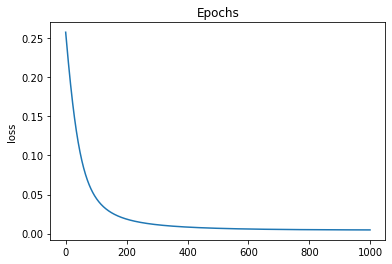

In [256]:
Y = list(range(epochs))
loss_batch = loss
plt.plot(Y,loss)
plt.ylabel('loss')
plt.title('Epochs')

# Mini Batch Gradient

In [257]:
# Modify the values if required it is scalable!!!!!
epochs = 1000
X = [[1,2]]# Train dataset
y = [[0,1]]# Target output
input_layer_size = len(X[0])
output_layer_size = len(y[0])
alpha = 0.1/len(X)# Learning rate
hidden_layers = 2# Number of Hidden Layers
nodes_in_each_hidden_layer = [2,2] # Hidden layer number of nodes as list
network = initNetworkBatch(input_layer_size,hidden_layers,nodes_in_each_hidden_layer,output_layer_size)
print("Neural Network looks like this ")
for i in range(len(network)):
    print("Layer ",i+1)
    print(network[i])
epoch = 0
loss = []
batch = 1
while epoch< epochs:
    E1 = 0
    print("Epoch ",epoch+1)
    for j in range(0,len(X),batch):
        Xs = X[j:j+batch]
        ys = y[j:j+batch]
        for i in range(len(Xs)):
            y_pred = forward_propagate(network,Xs[i]) 
            E = mean_squared_error(ys[i],y_pred)
            E1 +=E
            error(network,ys[i])
            backwardPropagationBatch(network,Xs[i])
        Batch_weight_updation(network,alpha)
    for layer in network:
        layerD = layer['D']
        for i in range(len(layerD)):
            for j in range(len(layerD[i])):
                layerD[i][j] = 0.0
    epoch += 1
    print("Loss occured is",E/len(X))
    loss.append(E/len(X))

Neural Network looks like this 
Layer  1
{'W': array([[0.69203556, 0.3285319 ],
       [0.33485818, 0.08523325]]), 'D': array([[0., 0.],
       [0., 0.]]), 'V': array([[0., 0.],
       [0., 0.]]), 'm': array([[0., 0.],
       [0., 0.]])}
Layer  2
{'W': array([[0.73555714, 0.17644889],
       [0.06585991, 0.24194497]]), 'D': array([[0., 0.],
       [0., 0.]]), 'V': array([[0., 0.],
       [0., 0.]]), 'm': array([[0., 0.],
       [0., 0.]])}
Layer  3
{'W': array([[0.80434131, 0.81149218],
       [0.79239227, 0.25938938]]), 'D': array([[0., 0.],
       [0., 0.]]), 'V': array([[0., 0.],
       [0., 0.]]), 'm': array([[0., 0.],
       [0., 0.]])}
Epoch  1
Loss occured is 0.32200300545465144
Epoch  2
Loss occured is 0.3178951738039446
Epoch  3
Loss occured is 0.31379784485907997
Epoch  4
Loss occured is 0.3097120794930215
Epoch  5
Loss occured is 0.30563897076442814
Epoch  6
Loss occured is 0.30157963819527667
Epoch  7
Loss occured is 0.29753522214565076
Epoch  8
Loss occured is 0.2935068783

Loss occured is 0.020192669263715612
Epoch  225
Loss occured is 0.020064957804316753
Epoch  226
Loss occured is 0.019938783929892734
Epoch  227
Loss occured is 0.01981412258091724
Epoch  228
Loss occured is 0.019690949203914575
Epoch  229
Loss occured is 0.019569239739554524
Epoch  230
Loss occured is 0.019448970611059227
Epoch  231
Loss occured is 0.019330118712913687
Epoch  232
Loss occured is 0.019212661399871107
Epoch  233
Loss occured is 0.019096576476245068
Epoch  234
Loss occured is 0.018981842185480238
Epoch  235
Loss occured is 0.018868437199993954
Epoch  236
Loss occured is 0.01875634061128098
Epoch  237
Loss occured is 0.018645531920274225
Epoch  238
Loss occured is 0.01853599102795422
Epoch  239
Loss occured is 0.018427698226200225
Epoch  240
Loss occured is 0.018320634188876608
Epoch  241
Loss occured is 0.01821477996314752
Epoch  242
Loss occured is 0.01811011696101384
Epoch  243
Loss occured is 0.018006626951066015
Epoch  244
Loss occured is 0.017904292050446944
Epoch  2

Epoch  467
Loss occured is 0.008216488480586894
Epoch  468
Loss occured is 0.008199364532910473
Epoch  469
Loss occured is 0.008182343331854448
Epoch  470
Loss occured is 0.008165424088983445
Epoch  471
Loss occured is 0.008148606023667267
Epoch  472
Loss occured is 0.008131888362984983
Epoch  473
Loss occured is 0.008115270341630235
Epoch  474
Loss occured is 0.008098751201818008
Epoch  475
Loss occured is 0.008082330193192655
Epoch  476
Loss occured is 0.008066006572737327
Epoch  477
Loss occured is 0.008049779604684643
Epoch  478
Loss occured is 0.008033648560428635
Epoch  479
Loss occured is 0.008017612718437896
Epoch  480
Loss occured is 0.008001671364170107
Epoch  481
Loss occured is 0.007985823789987618
Epoch  482
Loss occured is 0.007970069295074269
Epoch  483
Loss occured is 0.007954407185353445
Epoch  484
Loss occured is 0.007938836773407183
Epoch  485
Loss occured is 0.007923357378396473
Epoch  486
Loss occured is 0.007907968325982718
Epoch  487
Loss occured is 0.00789266894

Epoch  712
Loss occured is 0.005897904790543454
Epoch  713
Loss occured is 0.00589306293887272
Epoch  714
Loss occured is 0.005888242672857808
Epoch  715
Loss occured is 0.00588344386901626
Epoch  716
Loss occured is 0.005878666404564819
Epoch  717
Loss occured is 0.005873910157414351
Epoch  718
Loss occured is 0.005869175006164493
Epoch  719
Loss occured is 0.005864460830098556
Epoch  720
Loss occured is 0.00585976750917841
Epoch  721
Loss occured is 0.005855094924039445
Epoch  722
Loss occured is 0.00585044295598551
Epoch  723
Loss occured is 0.005845811486984036
Epoch  724
Loss occured is 0.0058412003996610555
Epoch  725
Loss occured is 0.0058366095772963795
Epoch  726
Loss occured is 0.005832038903818822
Epoch  727
Loss occured is 0.0058274882638013805
Epoch  728
Loss occured is 0.005822957542456573
Epoch  729
Loss occured is 0.005818446625631733
Epoch  730
Loss occured is 0.005813955399804411
Epoch  731
Loss occured is 0.005809483752077849
Epoch  732
Loss occured is 0.005805031570

Loss occured is 0.0051443761668601845
Epoch  953
Loss occured is 0.00514228864617469
Epoch  954
Loss occured is 0.005140205783531792
Epoch  955
Loss occured is 0.005138127543038365
Epoch  956
Loss occured is 0.005136053888993941
Epoch  957
Loss occured is 0.005133984785889902
Epoch  958
Loss occured is 0.005131920198408784
Epoch  959
Loss occured is 0.005129860091423496
Epoch  960
Loss occured is 0.005127804429996692
Epoch  961
Loss occured is 0.005125753179379843
Epoch  962
Loss occured is 0.005123706305012724
Epoch  963
Loss occured is 0.005121663772522513
Epoch  964
Loss occured is 0.005119625547723179
Epoch  965
Loss occured is 0.005117591596614697
Epoch  966
Loss occured is 0.005115561885382338
Epoch  967
Loss occured is 0.005113536380396034
Epoch  968
Loss occured is 0.005111515048209522
Epoch  969
Loss occured is 0.005109497855559748
Epoch  970
Loss occured is 0.005107484769366167
Epoch  971
Loss occured is 0.005105475756729942
Epoch  972
Loss occured is 0.005103470784933343
Epo

Text(0.5, 1.0, 'Epochs')

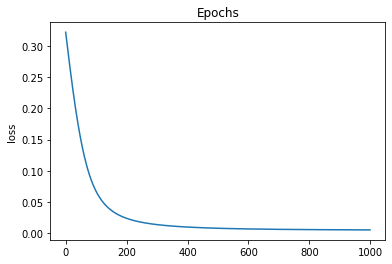

In [258]:
Y = list(range(epochs))
loss_mini_batch = loss
plt.plot(Y,loss)
plt.ylabel('loss')
plt.title('Epochs')

# RMS Prop

In [259]:
def RMSProp_weight_updation(network,alpha,beta):
    for i in range(len(network)):
        for j in range(len(network[i]['V'])):
            for k in range(len(network[i]['V'][j])):
                network[i]['V'][j][k] = beta*network[i]['V'][j][k]+(1-beta)*(network[i]['W'][j][k]**2)
                network[i]['W'][j][k] = network[i]['W'][j][k] - (alpha/np.sqrt(network[i]['V'][j][k]+1e-8))*network[i]['D'][j][k]

In [260]:
# Modify the values if required it is scalable!!!!!
epochs = 1000
beta = 0.5
X = [[1,2]]# Train dataset
y = [[0,1]]# Target output
input_layer_size = len(X[0])
output_layer_size = len(y[0])
alpha = 0.1/len(X)# Learning rate
hidden_layers = 2# Number of Hidden Layers
nodes_in_each_hidden_layer = [2,2] # Hidden layer number of nodes as list
network = initNetworkBatch(input_layer_size,hidden_layers,nodes_in_each_hidden_layer,output_layer_size)
print("Neural Network looks like this ")
for i in range(len(network)):
    print("Layer ",i+1)
    print(network[i])
epoch = 0
loss = []
while epoch< epochs:
    E1 = 0
    print("Epoch ",epoch+1)
    for i in range(len(X)):
        y_pred = forward_propagate(network,X[i]) 
        E = mean_squared_error(y[i],y_pred)
        E1 +=E
        error(network,y[i])
        backwardPropagationBatch(network,X[i])
    RMSProp_weight_updation(network,alpha,beta)
    for layer in network:
        layerD = layer['D']
        for i in range(len(layerD)):
            for j in range(len(layerD[i])):
                layerD[i][j] = 0.0
    epoch += 1
    print("Loss occured is",E/len(X))
    loss.append(E/len(X))

Neural Network looks like this 
Layer  1
{'W': array([[0.29425412, 0.81858155],
       [0.68486396, 0.44366965]]), 'D': array([[0., 0.],
       [0., 0.]]), 'V': array([[0., 0.],
       [0., 0.]]), 'm': array([[0., 0.],
       [0., 0.]])}
Layer  2
{'W': array([[0.37782164, 0.86870932],
       [0.69108501, 0.04640779]]), 'D': array([[0., 0.],
       [0., 0.]]), 'V': array([[0., 0.],
       [0., 0.]]), 'm': array([[0., 0.],
       [0., 0.]])}
Layer  3
{'W': array([[0.65279631, 0.85065416],
       [0.80687675, 0.66952114]]), 'D': array([[0., 0.],
       [0., 0.]]), 'V': array([[0., 0.],
       [0., 0.]]), 'm': array([[0., 0.],
       [0., 0.]])}
Epoch  1
Loss occured is 0.30735828256197856
Epoch  2
Loss occured is 0.29687235482585483
Epoch  3
Loss occured is 0.2882520341441632
Epoch  4
Loss occured is 0.28060872548066623
Epoch  5
Loss occured is 0.27310370796387
Epoch  6
Loss occured is 0.265478509892656
Epoch  7
Loss occured is 0.2575835364982548
Epoch  8
Loss occured is 0.249291801281048

Loss occured is 0.016281782834056988
Epoch  183
Loss occured is 0.01622822031423833
Epoch  184
Loss occured is 0.01617499465078713
Epoch  185
Loss occured is 0.01612212219625391
Epoch  186
Loss occured is 0.016069616134033054
Epoch  187
Loss occured is 0.01601748712049013
Epoch  188
Loss occured is 0.015965743767931473
Epoch  189
Loss occured is 0.015914393014987437
Epoch  190
Loss occured is 0.01586344041552436
Epoch  191
Loss occured is 0.015812890367399298
Epoch  192
Loss occured is 0.0157627462959903
Epoch  193
Loss occured is 0.015713010803179092
Epoch  194
Loss occured is 0.015663685789560823
Epoch  195
Loss occured is 0.015614772555636421
Epoch  196
Loss occured is 0.015566271886311992
Epoch  197
Loss occured is 0.015518184121999203
Epoch  198
Loss occured is 0.015470509218856638
Epoch  199
Loss occured is 0.015423246800152526
Epoch  200
Loss occured is 0.01537639620030892
Epoch  201
Loss occured is 0.015329956502869132
Epoch  202
Loss occured is 0.015283926573383858
Epoch  203


Epoch  399
Loss occured is 0.015807785144323166
Epoch  400
Loss occured is 0.015863428315257347
Epoch  401
Loss occured is 0.015915668512591703
Epoch  402
Loss occured is 0.015964912043987076
Epoch  403
Loss occured is 0.016011486569947816
Epoch  404
Loss occured is 0.01605566156381472
Epoch  405
Loss occured is 0.01609766231560445
Epoch  406
Loss occured is 0.016137679818541775
Epoch  407
Loss occured is 0.016175877939055942
Epoch  408
Loss occured is 0.016212398739563372
Epoch  409
Loss occured is 0.01624736651115953
Epoch  410
Loss occured is 0.01628089088378086
Epoch  411
Loss occured is 0.016313069262760778
Epoch  412
Loss occured is 0.016343988764370855
Epoch  413
Loss occured is 0.016373727772565235
Epoch  414
Loss occured is 0.016402357205133757
Epoch  415
Loss occured is 0.016429941554014414
Epoch  416
Loss occured is 0.016456539748037558
Epoch  417
Loss occured is 0.01648220587459307
Epoch  418
Loss occured is 0.016506989788161106
Epoch  419
Loss occured is 0.0165309376273509

Loss occured is 0.015593331667956751
Epoch  638
Loss occured is 0.015577950452626655
Epoch  639
Loss occured is 0.015562578166104162
Epoch  640
Loss occured is 0.015547215082045018
Epoch  641
Loss occured is 0.015531861468792773
Epoch  642
Loss occured is 0.015516517589474515
Epoch  643
Loss occured is 0.015501183702094693
Epoch  644
Loss occured is 0.015485860059627207
Epoch  645
Loss occured is 0.015470546910105566
Epoch  646
Loss occured is 0.0154552444967111
Epoch  647
Loss occured is 0.015439953057859564
Epoch  648
Loss occured is 0.015424672827285983
Epoch  649
Loss occured is 0.015409404034127706
Epoch  650
Loss occured is 0.015394146903005893
Epoch  651
Loss occured is 0.01537890165410538
Epoch  652
Loss occured is 0.015363668503252954
Epoch  653
Loss occured is 0.015348447661994105
Epoch  654
Loss occured is 0.015333239337668274
Epoch  655
Loss occured is 0.015318043733482535
Epoch  656
Loss occured is 0.015302861048584077
Epoch  657
Loss occured is 0.015287691478131027
Epoch 

Loss occured is 0.012833210590633422
Epoch  840
Loss occured is 0.012821540422970639
Epoch  841
Loss occured is 0.012809889458789957
Epoch  842
Loss occured is 0.012798257670599377
Epoch  843
Loss occured is 0.012786645030757344
Epoch  844
Loss occured is 0.01277505151147608
Epoch  845
Loss occured is 0.012763477084824781
Epoch  846
Loss occured is 0.012751921722732998
Epoch  847
Loss occured is 0.012740385396993723
Epoch  848
Loss occured is 0.01272886807926657
Epoch  849
Loss occured is 0.012717369741080828
Epoch  850
Loss occured is 0.012705890353838529
Epoch  851
Loss occured is 0.012694429888817499
Epoch  852
Loss occured is 0.012682988317174206
Epoch  853
Loss occured is 0.012671565609946735
Epoch  854
Loss occured is 0.012660161738057726
Epoch  855
Loss occured is 0.012648776672317065
Epoch  856
Loss occured is 0.012637410383424771
Epoch  857
Loss occured is 0.012626062841973627
Epoch  858
Loss occured is 0.012614734018452055
Epoch  859
Loss occured is 0.01260342388324662
Epoch 

Text(0.5, 1.0, 'Epochs')

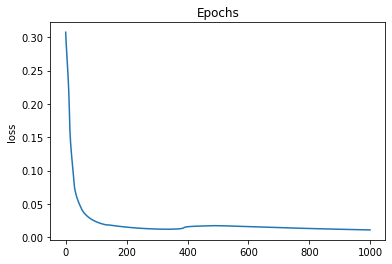

In [261]:
Y = list(range(epochs))
loss_rms_prop = loss
plt.plot(Y,loss)
plt.ylabel('loss')
plt.title('Epochs')

# Adagrad

In [262]:
def Adagrad_weight_updation(network,alpha):
    for i in range(len(network)):
        for j in range(len(network[i]['V'])):
            for k in range(len(network[i]['V'][j])):
                network[i]['V'][j][k] = network[i]['V'][j][k]+(network[i]['W'][j][k]**2)
                network[i]['W'][j][k] = network[i]['W'][j][k] - (alpha/np.sqrt(network[i]['V'][j][k]+1e-8))*network[i]['D'][j][k]

In [263]:
# Modify the values if required it is scalable!!!!!
epochs = 1000
X = [[1,2]]# Train dataset
y = [[0,1]]# Target output
input_layer_size = len(X[0])
output_layer_size = len(y[0])
alpha = 0.1/len(X)# Learning rate
hidden_layers = 2# Number of Hidden Layers
nodes_in_each_hidden_layer = [2,2] # Hidden layer number of nodes as list
network = initNetworkBatch(input_layer_size,hidden_layers,nodes_in_each_hidden_layer,output_layer_size)
print("Neural Network looks like this ")
for i in range(len(network)):
    print("Layer ",i+1)
    print(network[i])
epoch = 0
loss = []
while epoch< epochs:
    E1 = 0
    print("Epoch ",epoch+1)
    for i in range(len(X)):
        y_pred = forward_propagate(network,X[i]) 
        E = mean_squared_error(y[i],y_pred)
        E1 +=E
        error(network,y[i])
        backwardPropagationBatch(network,X[i])
    Adagrad_weight_updation(network,alpha)
    for layer in network:
        layerD = layer['D']
        for i in range(len(layerD)):
            for j in range(len(layerD[i])):
                layerD[i][j] = 0.0
    epoch += 1
    print("Loss occured is",E/len(X))
    loss.append(E/len(X))

Neural Network looks like this 
Layer  1
{'W': array([[0.79321713, 0.14373518],
       [0.87254109, 0.2142453 ]]), 'D': array([[0., 0.],
       [0., 0.]]), 'V': array([[0., 0.],
       [0., 0.]]), 'm': array([[0., 0.],
       [0., 0.]])}
Layer  2
{'W': array([[0.62356009, 0.86899832],
       [0.5720979 , 0.9917599 ]]), 'D': array([[0., 0.],
       [0., 0.]]), 'V': array([[0., 0.],
       [0., 0.]]), 'm': array([[0., 0.],
       [0., 0.]])}
Layer  3
{'W': array([[0.37340421, 0.0690381 ],
       [0.6349919 , 0.71612167]]), 'D': array([[0., 0.],
       [0., 0.]]), 'V': array([[0., 0.],
       [0., 0.]]), 'm': array([[0., 0.],
       [0., 0.]])}
Epoch  1
Loss occured is 0.20460116389636332
Epoch  2
Loss occured is 0.16479831689088012
Epoch  3
Loss occured is 0.15299445528660466
Epoch  4
Loss occured is 0.1452512140821872
Epoch  5
Loss occured is 0.13928229298222367
Epoch  6
Loss occured is 0.1343374840015078
Epoch  7
Loss occured is 0.1300694563691084
Epoch  8
Loss occured is 0.12628645595

Loss occured is 0.051747345129944604
Epoch  183
Loss occured is 0.051690745510365864
Epoch  184
Loss occured is 0.05163463348737428
Epoch  185
Loss occured is 0.051579002759920896
Epoch  186
Loss occured is 0.051523847124039804
Epoch  187
Loss occured is 0.051469160469360425
Epoch  188
Loss occured is 0.05141493677578174
Epoch  189
Loss occured is 0.05136117011030279
Epoch  190
Loss occured is 0.051307854624006256
Epoch  191
Loss occured is 0.051254984549189225
Epoch  192
Loss occured is 0.05120255419663787
Epoch  193
Loss occured is 0.05115055795304112
Epoch  194
Loss occured is 0.05109899027853888
Epoch  195
Loss occured is 0.05104784570440163
Epoch  196
Loss occured is 0.05099711883083573
Epoch  197
Loss occured is 0.05094680432491189
Epoch  198
Loss occured is 0.050896896918611795
Epoch  199
Loss occured is 0.05084739140698946
Epoch  200
Loss occured is 0.05079828264644305
Epoch  201
Loss occured is 0.05074956555309384
Epoch  202
Loss occured is 0.05070123510126798
Epoch  203
Loss 

Loss occured is 0.045105617094943595
Epoch  390
Loss occured is 0.0450848499154812
Epoch  391
Loss occured is 0.04506413711791182
Epoch  392
Loss occured is 0.04504347842226643
Epoch  393
Loss occured is 0.045022873551457884
Epoch  394
Loss occured is 0.045002322231226716
Epoch  395
Loss occured is 0.044981824190087824
Epoch  396
Loss occured is 0.04496137915927915
Epoch  397
Loss occured is 0.04494098687271124
Epoch  398
Loss occured is 0.04492064706691802
Epoch  399
Loss occured is 0.04490035948100911
Epoch  400
Loss occured is 0.044880123856623044
Epoch  401
Loss occured is 0.04485993993788179
Epoch  402
Loss occured is 0.04483980747134644
Epoch  403
Loss occured is 0.04481972620597377
Epoch  404
Loss occured is 0.04479969589307414
Epoch  405
Loss occured is 0.04477971628627034
Epoch  406
Loss occured is 0.04475978714145741
Epoch  407
Loss occured is 0.044739908216763324
Epoch  408
Loss occured is 0.044720079272510926
Epoch  409
Loss occured is 0.04470030007118056
Epoch  410
Loss oc

Loss occured is 0.04150123386375
Epoch  611
Loss occured is 0.04148832282688871
Epoch  612
Loss occured is 0.04147543510089956
Epoch  613
Loss occured is 0.04146257061268347
Epoch  614
Loss occured is 0.04144972928946443
Epoch  615
Loss occured is 0.04143691105878772
Epoch  616
Loss occured is 0.041424115848518
Epoch  617
Loss occured is 0.04141134358683743
Epoch  618
Loss occured is 0.04139859420224393
Epoch  619
Loss occured is 0.041385867623549205
Epoch  620
Loss occured is 0.04137316377987722
Epoch  621
Loss occured is 0.04136048260066204
Epoch  622
Loss occured is 0.041347824015646385
Epoch  623
Loss occured is 0.04133518795487967
Epoch  624
Loss occured is 0.041322574348716334
Epoch  625
Loss occured is 0.04130998312781403
Epoch  626
Loss occured is 0.04129741422313206
Epoch  627
Loss occured is 0.041284867565929514
Epoch  628
Loss occured is 0.041272343087763536
Epoch  629
Loss occured is 0.041259840720487856
Epoch  630
Loss occured is 0.04124736039625087
Epoch  631
Loss occured

Loss occured is 0.03916476590185537
Epoch  826
Loss occured is 0.03915558931829963
Epoch  827
Loss occured is 0.039146425571759125
Epoch  828
Loss occured is 0.03913727463069286
Epoch  829
Loss occured is 0.03912813646366915
Epoch  830
Loss occured is 0.03911901103936526
Epoch  831
Loss occured is 0.039109898326566854
Epoch  832
Loss occured is 0.0391007982941675
Epoch  833
Loss occured is 0.039091710911168226
Epoch  834
Loss occured is 0.03908263614667713
Epoch  835
Loss occured is 0.0390735739699086
Epoch  836
Loss occured is 0.03906452435018329
Epoch  837
Loss occured is 0.03905548725692725
Epoch  838
Loss occured is 0.039046462659671766
Epoch  839
Loss occured is 0.03903745052805256
Epoch  840
Loss occured is 0.03902845083180976
Epoch  841
Loss occured is 0.039019463540787
Epoch  842
Loss occured is 0.03901048862493131
Epoch  843
Loss occured is 0.03900152605429244
Epoch  844
Loss occured is 0.03899257579902253
Epoch  845
Loss occured is 0.03898363782937557
Epoch  846
Loss occured 

Text(0.5, 1.0, 'Epochs')

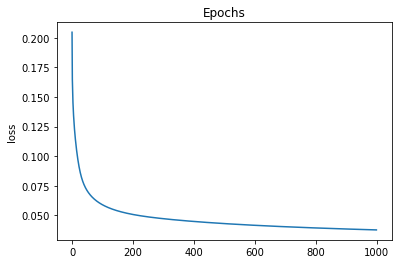

In [264]:
Y = list(range(epochs))
loss_adagrad = loss
plt.plot(Y,loss)
plt.ylabel('loss')
plt.title('Epochs')

# Momentum

In [265]:
def Momentum_weight_updation(network,alpha,gamma):
    for i in range(len(network)):
        for j in range(len(network[i]['V'])):
            for k in range(len(network[i]['V'][j])):
                network[i]['V'][j][k] = gamma*network[i]['V'][j][k]+alpha*(network[i]['W'][j][k])
                network[i]['W'][j][k] = network[i]['W'][j][k] - network[i]['V'][j][k]

In [283]:
# Modify the values if required it is scalable!!!!!
epochs = 1000
X = [[1,2]]# Train dataset
y = [[0,1]]# Target output
input_layer_size = len(X[0])
output_layer_size = len(y[0])
alpha = 0.1/len(X)# Learning rate
gamma = 0.8
hidden_layers = 2# Number of Hidden Layers
nodes_in_each_hidden_layer = [2,2] # Hidden layer number of nodes as list
network = initNetworkBatch(input_layer_size,hidden_layers,nodes_in_each_hidden_layer,output_layer_size)
print("Neural Network looks like this ")
for i in range(len(network)):
    print("Layer ",i+1)
    print(network[i])
epoch = 0
loss = []
while epoch< epochs:
    E1 = 0
    print("Epoch ",epoch+1)
    for i in range(len(X)):
        y_pred = forward_propagate(network,X[i]) 
        E = mean_squared_error(y[i],y_pred)
        E1 +=E
        error(network,y[i])
        backwardPropagationBatch(network,X[i])
    Momentum_weight_updation(network,alpha,gamma)
    for layer in network:
        layerD = layer['D']
        for i in range(len(layerD)):
            for j in range(len(layerD[i])):
                layerD[i][j] = 0.0
    epoch += 1
    print("Loss occured is",E/len(X))
    loss.append(E/len(X))

Neural Network looks like this 
Layer  1
{'W': array([[0.92002987, 0.40479407],
       [0.30187132, 0.66158454]]), 'D': array([[0., 0.],
       [0., 0.]]), 'V': array([[0., 0.],
       [0., 0.]]), 'm': array([[0., 0.],
       [0., 0.]])}
Layer  2
{'W': array([[0.22862   , 0.07825274],
       [0.015598  , 0.71818168]]), 'D': array([[0., 0.],
       [0., 0.]]), 'V': array([[0., 0.],
       [0., 0.]]), 'm': array([[0., 0.],
       [0., 0.]])}
Layer  3
{'W': array([[0.17214523, 0.99381191],
       [0.82000752, 0.26884607]]), 'D': array([[0., 0.],
       [0., 0.]]), 'V': array([[0., 0.],
       [0., 0.]]), 'm': array([[0., 0.],
       [0., 0.]])}
Epoch  1
Loss occured is 0.28924380885956974
Epoch  2
Loss occured is 0.28171603987070026
Epoch  3
Loss occured is 0.27080655961589206
Epoch  4
Loss occured is 0.26076551162717787
Epoch  5
Loss occured is 0.2540118684080853
Epoch  6
Loss occured is 0.25070313647355813
Epoch  7
Loss occured is 0.24977250797374584
Epoch  8
Loss occured is 0.250013569

Epoch  199
Loss occured is 0.2500000000011747
Epoch  200
Loss occured is 0.2500000000011147
Epoch  201
Loss occured is 0.2500000000009553
Epoch  202
Loss occured is 0.2500000000007322
Epoch  203
Loss occured is 0.2500000000004805
Epoch  204
Loss occured is 0.2500000000002311
Epoch  205
Loss occured is 0.25000000000000844
Epoch  206
Loss occured is 0.24999999999982953
Epoch  207
Loss occured is 0.2499999999997034
Epoch  208
Loss occured is 0.24999999999963218
Epoch  209
Loss occured is 0.24999999999961198
Epoch  210
Loss occured is 0.24999999999963463
Epoch  211
Loss occured is 0.24999999999968925
Epoch  212
Loss occured is 0.24999999999976408
Epoch  213
Loss occured is 0.24999999999984757
Epoch  214
Loss occured is 0.2499999999999295
Epoch  215
Loss occured is 0.2500000000000021
Epoch  216
Loss occured is 0.25000000000006006
Epoch  217
Loss occured is 0.25000000000010036
Epoch  218
Loss occured is 0.25000000000012257
Epoch  219
Loss occured is 0.25000000000012806
Epoch  220
Loss occure

Loss occured is 0.25
Epoch  447
Loss occured is 0.25
Epoch  448
Loss occured is 0.25
Epoch  449
Loss occured is 0.25
Epoch  450
Loss occured is 0.25
Epoch  451
Loss occured is 0.25
Epoch  452
Loss occured is 0.25
Epoch  453
Loss occured is 0.25
Epoch  454
Loss occured is 0.25
Epoch  455
Loss occured is 0.25
Epoch  456
Loss occured is 0.25
Epoch  457
Loss occured is 0.25
Epoch  458
Loss occured is 0.25
Epoch  459
Loss occured is 0.25
Epoch  460
Loss occured is 0.25
Epoch  461
Loss occured is 0.25
Epoch  462
Loss occured is 0.25
Epoch  463
Loss occured is 0.25
Epoch  464
Loss occured is 0.25
Epoch  465
Loss occured is 0.25
Epoch  466
Loss occured is 0.25
Epoch  467
Loss occured is 0.25
Epoch  468
Loss occured is 0.25
Epoch  469
Loss occured is 0.25
Epoch  470
Loss occured is 0.25
Epoch  471
Loss occured is 0.25
Epoch  472
Loss occured is 0.25
Epoch  473
Loss occured is 0.25
Epoch  474
Loss occured is 0.25
Epoch  475
Loss occured is 0.25
Epoch  476
Loss occured is 0.25
Epoch  477
Loss occ

Epoch  870
Loss occured is 0.25
Epoch  871
Loss occured is 0.25
Epoch  872
Loss occured is 0.25
Epoch  873
Loss occured is 0.25
Epoch  874
Loss occured is 0.25
Epoch  875
Loss occured is 0.25
Epoch  876
Loss occured is 0.25
Epoch  877
Loss occured is 0.25
Epoch  878
Loss occured is 0.25
Epoch  879
Loss occured is 0.25
Epoch  880
Loss occured is 0.25
Epoch  881
Loss occured is 0.25
Epoch  882
Loss occured is 0.25
Epoch  883
Loss occured is 0.25
Epoch  884
Loss occured is 0.25
Epoch  885
Loss occured is 0.25
Epoch  886
Loss occured is 0.25
Epoch  887
Loss occured is 0.25
Epoch  888
Loss occured is 0.25
Epoch  889
Loss occured is 0.25
Epoch  890
Loss occured is 0.25
Epoch  891
Loss occured is 0.25
Epoch  892
Loss occured is 0.25
Epoch  893
Loss occured is 0.25
Epoch  894
Loss occured is 0.25
Epoch  895
Loss occured is 0.25
Epoch  896
Loss occured is 0.25
Epoch  897
Loss occured is 0.25
Epoch  898
Loss occured is 0.25
Epoch  899
Loss occured is 0.25
Epoch  900
Loss occured is 0.25
Epoch  9

Text(0.5, 1.0, 'Epochs')

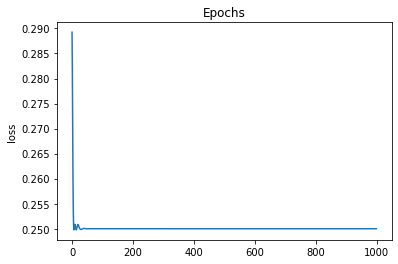

In [284]:
Y = list(range(epochs))
loss_momentum = loss
plt.plot(Y,loss)
plt.ylabel('loss')
plt.title('Epochs')

# Adamax

In [268]:
def Adamax_weight_updation(network,alpha,beta1,beta2):
    for i in range(len(network)):
        for j in range(len(network[i]['V'])):
            for k in range(len(network[i]['V'][j])):
                network[i]['m'][j][k] = beta1*network[i]['m'][j][k]+(1-beta1)*(network[i]['W'][j][k])
                network[i]['V'][j][k] = beta2*network[i]['V'][j][k]+(1-beta2)*(network[i]['W'][j][k]**2)
                network[i]['W'][j][k] = network[i]['W'][j][k] - (alpha/np.sqrt((network[i]['V'][j][k]/(1-beta2))+1e-8))*(network[i]['m'][j][k]/(1-beta1))

In [280]:
# Modify the values if required it is scalable!!!!!
epochs = 1000
X = [[1,2]]# Train dataset
y = [[0,1]]# Target output
input_layer_size = len(X[0])
output_layer_size = len(y[0])
alpha = 0.1/len(X)# Learning rate
beta1 = 0.5
beta2 = 0.6
hidden_layers = 2# Number of Hidden Layers
nodes_in_each_hidden_layer = [2,2] # Hidden layer number of nodes as list
network = initNetworkBatch(input_layer_size,hidden_layers,nodes_in_each_hidden_layer,output_layer_size)
print("Neural Network looks like this ")
for i in range(len(network)):
    print("Layer ",i+1)
    print(network[i])

Neural Network looks like this 
Layer  1
{'W': array([[0.33218932, 0.52746965],
       [0.69384568, 0.40107506]]), 'D': array([[0., 0.],
       [0., 0.]]), 'V': array([[0., 0.],
       [0., 0.]]), 'm': array([[0., 0.],
       [0., 0.]])}
Layer  2
{'W': array([[0.64853602, 0.96098525],
       [0.55569276, 0.63815284]]), 'D': array([[0., 0.],
       [0., 0.]]), 'V': array([[0., 0.],
       [0., 0.]]), 'm': array([[0., 0.],
       [0., 0.]])}
Layer  3
{'W': array([[0.99136062, 0.23923284],
       [0.54482072, 0.31030089]]), 'D': array([[0., 0.],
       [0., 0.]]), 'V': array([[0., 0.],
       [0., 0.]]), 'm': array([[0., 0.],
       [0., 0.]])}


In [281]:
epoch = 0
epochs = 1000
loss = []
while epoch< epochs:
    E1 = 0
    print("Epoch ",epoch+1)
    for i in range(len(X)):
        y_pred = forward_propagate(network,X[i]) 
        E = mean_squared_error(y[i],y_pred)
        E1 +=E
        error(network,y[i])
        backwardPropagationBatch(network,X[i])
    Adamax_weight_updation(network,alpha,beta1,beta2)
    for layer in network:
        layerD = layer['D']
        for i in range(len(layerD)):
            for j in range(len(layerD[i])):
                layerD[i][j] = 0.0
    epoch += 1
    print("Loss occured is",E/len(X))
    loss.append(E/len(X))

Epoch  1
Loss occured is 0.3190069994075369
Epoch  2
Loss occured is 0.305486400411998
Epoch  3
Loss occured is 0.29337851660835057
Epoch  4
Loss occured is 0.28610833185703793
Epoch  5
Loss occured is 0.2841228583779912
Epoch  6
Loss occured is 0.2823201924977182
Epoch  7
Loss occured is 0.27729347584513664
Epoch  8
Loss occured is 0.26730932025112397
Epoch  9
Loss occured is 0.2564604096808778
Epoch  10
Loss occured is 0.24998785541605137
Epoch  11
Loss occured is 0.2474931445426088
Epoch  12
Loss occured is 0.24429031118641148
Epoch  13
Loss occured is 0.24689477283140907
Epoch  14
Loss occured is 0.2518515210411044
Epoch  15
Loss occured is 0.2467185629938247
Epoch  16
Loss occured is 0.255649259456824
Epoch  17
Loss occured is 0.2485052018864656
Epoch  18
Loss occured is 0.24762529899695468
Epoch  19
Loss occured is 0.25444022256740195
Epoch  20
Loss occured is 0.24506751869414933
Epoch  21
Loss occured is 0.25341563676069934
Epoch  22
Loss occured is 0.2496649805309496
Epoch  23


Loss occured is 0.24646131503789073
Epoch  198
Loss occured is 0.25069460798463755
Epoch  199
Loss occured is 0.25040032360744696
Epoch  200
Loss occured is 0.2506559756024538
Epoch  201
Loss occured is 0.2455695460698249
Epoch  202
Loss occured is 0.25788051472388307
Epoch  203
Loss occured is 0.24681373608077367
Epoch  204
Loss occured is 0.24594314177004278
Epoch  205
Loss occured is 0.25767875305951216
Epoch  206
Loss occured is 0.2447396294063066
Epoch  207
Loss occured is 0.25129043666674256
Epoch  208
Loss occured is 0.250666268292029
Epoch  209
Loss occured is 0.24959187242729597
Epoch  210
Loss occured is 0.24828950832961227
Epoch  211
Loss occured is 0.2571849302738394
Epoch  212
Loss occured is 0.24255627151075743
Epoch  213
Loss occured is 0.24993228665108386
Epoch  214
Loss occured is 0.25717695707028776
Epoch  215
Loss occured is 0.2426625728784787
Epoch  216
Loss occured is 0.2522522908773348
Epoch  217
Loss occured is 0.25160638373593897
Epoch  218
Loss occured is 0.247

Epoch  406
Loss occured is 0.2515885673795792
Epoch  407
Loss occured is 0.24780370055214324
Epoch  408
Loss occured is 0.2505265590231548
Epoch  409
Loss occured is 0.24948792942072034
Epoch  410
Loss occured is 0.25234973340355915
Epoch  411
Loss occured is 0.24830591361359716
Epoch  412
Loss occured is 0.24999658652953322
Epoch  413
Loss occured is 0.25071112196544487
Epoch  414
Loss occured is 0.2476421450502152
Epoch  415
Loss occured is 0.2532625613838617
Epoch  416
Loss occured is 0.24829136365526064
Epoch  417
Loss occured is 0.2503496045194277
Epoch  418
Loss occured is 0.25127546537986534
Epoch  419
Loss occured is 0.24887503772473688
Epoch  420
Loss occured is 0.2480064490505325
Epoch  421
Loss occured is 0.25162183418858686
Epoch  422
Loss occured is 0.2518077936116435
Epoch  423
Loss occured is 0.24605807733764867
Epoch  424
Loss occured is 0.25470764023412673
Epoch  425
Loss occured is 0.24479457364546414
Epoch  426
Loss occured is 0.25308111936509453
Epoch  427
Loss occu

Loss occured is 0.24580971116431205
Epoch  628
Loss occured is 0.25628853801695406
Epoch  629
Loss occured is 0.24647616978129794
Epoch  630
Loss occured is 0.24807500882229888
Epoch  631
Loss occured is 0.25618420815539056
Epoch  632
Loss occured is 0.24730048399367188
Epoch  633
Loss occured is 0.24735475199622975
Epoch  634
Loss occured is 0.2527006900305294
Epoch  635
Loss occured is 0.24917251501995513
Epoch  636
Loss occured is 0.2509172781378922
Epoch  637
Loss occured is 0.24904761577823492
Epoch  638
Loss occured is 0.24979689735582805
Epoch  639
Loss occured is 0.25195978790513857
Epoch  640
Loss occured is 0.24691577149617924
Epoch  641
Loss occured is 0.25340356999339764
Epoch  642
Loss occured is 0.24632175043828436
Epoch  643
Loss occured is 0.25341127512320866
Epoch  644
Loss occured is 0.2512044498286752
Epoch  645
Loss occured is 0.2471057279795587
Epoch  646
Loss occured is 0.2512379600773418
Epoch  647
Loss occured is 0.248502071885423
Epoch  648
Loss occured is 0.25

Epoch  837
Loss occured is 0.24788869496185856
Epoch  838
Loss occured is 0.25122135997502115
Epoch  839
Loss occured is 0.24745412844941517
Epoch  840
Loss occured is 0.2503710641182961
Epoch  841
Loss occured is 0.2536076603308943
Epoch  842
Loss occured is 0.2461172865994829
Epoch  843
Loss occured is 0.2509640781727444
Epoch  844
Loss occured is 0.2516171062513293
Epoch  845
Loss occured is 0.24695856924068257
Epoch  846
Loss occured is 0.2543078785726004
Epoch  847
Loss occured is 0.246556695989474
Epoch  848
Loss occured is 0.251211555932199
Epoch  849
Loss occured is 0.2509837776429154
Epoch  850
Loss occured is 0.24735718531122888
Epoch  851
Loss occured is 0.25428369978247045
Epoch  852
Loss occured is 0.2454743353238408
Epoch  853
Loss occured is 0.2512498043187578
Epoch  854
Loss occured is 0.2521008082879615
Epoch  855
Loss occured is 0.24684502656582535
Epoch  856
Loss occured is 0.25365669656603307
Epoch  857
Loss occured is 0.24777535989987315
Epoch  858
Loss occured is 

Text(0.5, 1.0, 'Epochs')

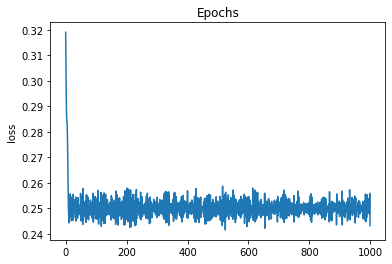

In [282]:
Y = list(range(epochs))
loss_adamax = loss
plt.plot(Y,loss)
plt.ylabel('loss')
plt.title('Epochs')

# SGD

In [272]:
def SGD_weight_updation(network,alpha):
    for i in range(len(network)):
        network[i]['W'] = network[i]['W'] - alpha*network[i]['D']

In [273]:
# Back propagation which will calculate the derivative of each weight for each node of each layer
def backwardPropagationSGD(network,inputs):
    for i in range(len(network)):
        arr = np.zeros((len(network[i]['W']),len(network[i]['W'][0])))
        for j in range(len(network[i]['W'])):
            for k in range(len(network[i]['W'][0])):
                if i == 0:
                    arr[j][k] = sigmoid_derivative(network[i]['outputs'][j])*(-inputs[k])*backPropagateHelper(network,i+1,j)
                elif i != len(network)-1:
                    arr[j][k] = sigmoid_derivative(network[i]['outputs'][j])*(-network[i-1]['outputs'][k])*backPropagateHelper(network,i+1,j)
                else:
                    arr[j][k] = sigmoid_derivative(network[i]['outputs'][j])*(-network[i-1]['outputs'][k])*(2*(network[i]['error'][j]))
        network[i]['D'] = arr

In [274]:
# Modify the values if required it is scalable!!!!!
epochs = 1000
X = [[1,2]]# Train dataset
y = [[0,1]]# Target output
input_layer_size = len(X[0])
output_layer_size = len(y[0])
alpha = 0.1# Learning rate
hidden_layers = 2# Number of Hidden Layers
nodes_in_each_hidden_layer = [2,2] # Hidden layer number of nodes as list
network = initNetworkBatch(input_layer_size,hidden_layers,nodes_in_each_hidden_layer,output_layer_size)
print("Neural Network looks like this ")
for i in range(len(network)):
    print("Layer ",i+1)
    print(network[i])
# SGD for neural nwtworks
epoch = 0
loss = []
while epoch< epochs:
    E1 = 0
    for i in range(len(X)):
        y_pred = forward_propagate(network,X[i]) 
        E = mean_squared_error(y[i],y_pred)
        E1 +=E
        error(network,y[i])
        backwardPropagationSGD(network,X[i])
        SGD_weight_updation(network,alpha)
        print("Epoch ",epoch+1)
        print("Loss ",E)
    epoch += 1
    loss.append(E/len(X))

Neural Network looks like this 
Layer  1
{'W': array([[0.95937659, 0.0224425 ],
       [0.35504111, 0.5019159 ]]), 'D': array([[0., 0.],
       [0., 0.]]), 'V': array([[0., 0.],
       [0., 0.]]), 'm': array([[0., 0.],
       [0., 0.]])}
Layer  2
{'W': array([[0.29665503, 0.01732036],
       [0.49079554, 0.05665277]]), 'D': array([[0., 0.],
       [0., 0.]]), 'V': array([[0., 0.],
       [0., 0.]]), 'm': array([[0., 0.],
       [0., 0.]])}
Layer  3
{'W': array([[0.98267746, 0.32690297],
       [0.90074013, 0.81903554]]), 'D': array([[0., 0.],
       [0., 0.]]), 'V': array([[0., 0.],
       [0., 0.]]), 'm': array([[0., 0.],
       [0., 0.]])}
Epoch  1
Loss  0.266252551060855
Epoch  2
Loss  0.2628045614723307
Epoch  3
Loss  0.25937264982347286
Epoch  4
Loss  0.2559578883742461
Epoch  5
Loss  0.25256131030978324
Epoch  6
Loss  0.24918390868537546
Epoch  7
Loss  0.24582663567864674
Epoch  8
Loss  0.24249040213078782
Epoch  9
Loss  0.23917607735666369
Epoch  10
Loss  0.23588448920198252
Epo

Loss  0.008440567047258537
Epoch  412
Loss  0.008416588494594786
Epoch  413
Loss  0.008392757380394945
Epoch  414
Loss  0.008369072413574099
Epoch  415
Loss  0.008345532317702489
Epoch  416
Loss  0.008322135830803514
Epoch  417
Loss  0.00829888170515503
Epoch  418
Loss  0.008275768707093826
Epoch  419
Loss  0.008252795616823185
Epoch  420
Loss  0.00822996122822367
Epoch  421
Loss  0.00820726434866679
Epoch  422
Loss  0.00818470379883166
Epoch  423
Loss  0.008162278412524702
Epoch  424
Loss  0.008139987036502042
Epoch  425
Loss  0.008117828530294798
Epoch  426
Loss  0.008095801766037152
Epoch  427
Loss  0.008073905628297098
Epoch  428
Loss  0.008052139013909793
Epoch  429
Loss  0.008030500831813689
Epoch  430
Loss  0.008008990002889056
Epoch  431
Loss  0.007987605459799109
Epoch  432
Loss  0.007966346146833598
Epoch  433
Loss  0.0079452110197549
Epoch  434
Loss  0.00792419904564633
Epoch  435
Loss  0.007903309202762944
Epoch  436
Loss  0.007882540480384673
Epoch  437
Loss  0.00786189187

Epoch  632
Loss  0.005317394445473338
Epoch  633
Loss  0.005309247611676067
Epoch  634
Loss  0.005301133043216133
Epoch  635
Loss  0.0052930505662899556
Epoch  636
Loss  0.005285000008355512
Epoch  637
Loss  0.005276981198121106
Epoch  638
Loss  0.005268993965534248
Epoch  639
Loss  0.005261038141770541
Epoch  640
Loss  0.005253113559222923
Epoch  641
Loss  0.005245220051490718
Epoch  642
Loss  0.005237357453369026
Epoch  643
Loss  0.005229525600838135
Epoch  644
Loss  0.00522172433105309
Epoch  645
Loss  0.0052139534823332665
Epoch  646
Loss  0.005206212894152212
Epoch  647
Loss  0.005198502407127437
Epoch  648
Loss  0.005190821863010421
Epoch  649
Loss  0.005183171104676669
Epoch  650
Loss  0.005175549976115884
Epoch  651
Loss  0.005167958322422247
Epoch  652
Loss  0.005160395989784749
Epoch  653
Loss  0.005152862825477772
Epoch  654
Loss  0.005145358677851509
Epoch  655
Loss  0.0051378833963227465
Epoch  656
Loss  0.005130436831365574
Epoch  657
Loss  0.005123018834502277
Epoch  658

Loss  0.004004438599850613
Epoch  875
Loss  0.004000934656931947
Epoch  876
Loss  0.003997441812059002
Epoch  877
Loss  0.003993960025248301
Epoch  878
Loss  0.0039904892567174735
Epoch  879
Loss  0.003987029466883991
Epoch  880
Loss  0.0039835806163638614
Epoch  881
Loss  0.003980142665970273
Epoch  882
Loss  0.003976715576712442
Epoch  883
Loss  0.003973299309794217
Epoch  884
Loss  0.003969893826612928
Epoch  885
Loss  0.003966499088758041
Epoch  886
Loss  0.003963115058010008
Epoch  887
Loss  0.003959741696338977
Epoch  888
Loss  0.003956378965903585
Epoch  889
Loss  0.003953026829049781
Epoch  890
Loss  0.003949685248309554
Epoch  891
Loss  0.003946354186399815
Epoch  892
Loss  0.003943033606221129
Epoch  893
Loss  0.00393972347085663
Epoch  894
Loss  0.003936423743570788
Epoch  895
Loss  0.003933134387808275
Epoch  896
Loss  0.003929855367192782
Epoch  897
Loss  0.003926586645525934
Epoch  898
Loss  0.003923328186786126
Epoch  899
Loss  0.00392007995512736
Epoch  900
Loss  0.0039

Text(0.5, 1.0, 'Epochs')

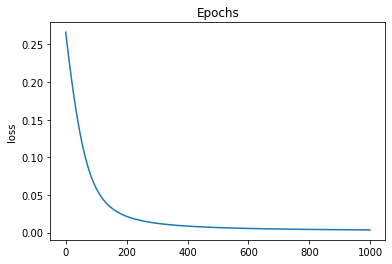

In [275]:
Y = list(range(epochs))
loss_sgd = loss
plt.plot(Y,loss)
plt.ylabel('loss')
plt.title('Epochs')

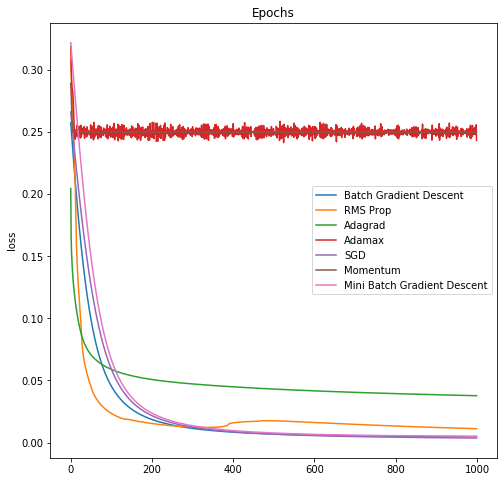

In [285]:
Y = list(range(epochs))
plt.figure(figsize=(8,8))
plt.plot(Y,loss_batch,label = 'Batch Gradient Descent')
plt.plot(Y,loss_rms_prop,label = 'RMS Prop')
plt.plot(Y,loss_adagrad,label = 'Adagrad')
plt.plot(Y,loss_adamax,label = 'Adamax')
plt.plot(Y,loss_sgd,label = 'SGD')
plt.plot(Y,loss_momentum,label = 'Momentum')
plt.plot(Y,loss_mini_batch,label = 'Mini Batch Gradient Descent')
plt.ylabel('loss')
plt.title('Epochs')
plt.legend()